# Finding the Best Aperture for an EB False Positive

When a neighbouring EB contaminates your target, it can mimic a planet signal. Finding the optimal aperture in this cases is particularly important. 

Here I'm going to use the Kepler target **KIC 3248033**, (also known as KOI 6.01) which was detected by the Kepler Pipeline as a planet candidate. However, the signal is coming from a neighbouring eclipsing binary. Below I use `ApertureOptimizer` to find the best aperture for the periodic signal.

Note that I am using the transit parameters from [the exoplanet archive](https://exoplanetarchive.ipac.caltech.edu/) to create the optimal mask.

* Period 1.334104268d
* t$_0$ 133.701635d
* Duration 3.0142 hours

In [1]:
import lightkurve as lk
from apertureoptimizer import ApertureOptimizer

# Download KOI 6.01, an exoplanet False Positive
tpf = lk.search_targetpixelfile(3248033, quarter=8).download()

# Define a corrector function
def corrector(lc):
    clc = lc.copy().flatten().remove_outliers(sigma_upper=2, sigma_lower=10)
    return clc

# Make an ApertureOptimizer Class, pass in the False Positive parameters
a = ApertureOptimizer(tpf, period=1.334104268, t0=133.701635, duration=3.0142/24, corrector=corrector)

Searching Neighbours...:  79%|███████▊  | 44/56 [00:10<00:02,  4.21it/s]

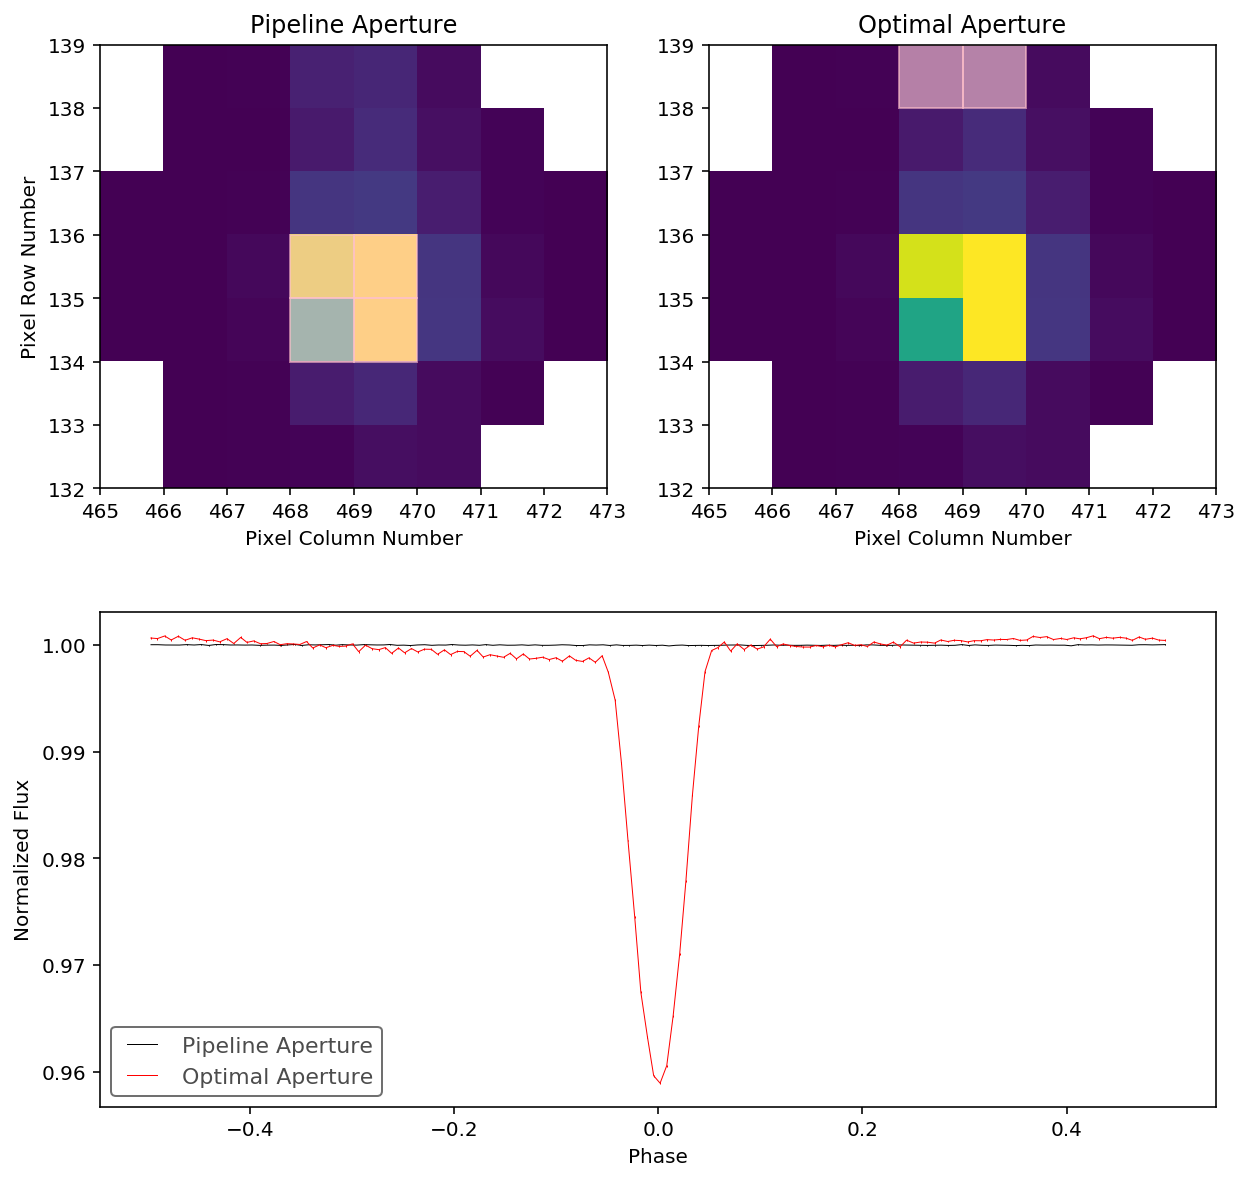

In [2]:
# Optimize the aperture
a.optimize()

# Plot the results
a.plot_results()

# Use the best light curve as you normally would.
lc = a.best_lc

We can see that the pipeline aperture selects the main target in the TPF. However, the optimal aperture for the periodic signal is in at the top, and no where near the main target. This produces an enormous eclipsing binary signal in the new light curve.